In [68]:
import pandas as pd
import seaborn as sns
from glob import glob
from matplotlib.font_manager import fontManager, FontProperties

path = "/usr/share/fonts/opentype/linux-libertine/LinBiolinum_R.otf"
fontManager.addfont(path)
sns.set_theme(style="ticks", font=FontProperties(fname=path).get_name(), font_scale=1.2)

In [89]:
data = pd.concat([pd.read_csv(data, names=[
    "Variant", "#Replica/Region", "#Client/Region", "#PutClient/Region", "Throughput", "Latency"
]) for data in glob('cops-*.txt')], ignore_index=True)
data["Put %"] = data["#PutClient/Region"] / 2 / data["#Client/Region"] * 100
data = data.sort_values(by="Latency")
data["Latency (ms)"] = data["Latency"] * 1000
data

,Variant,#Replica/Region,#Client/Region,#PutClient/Region,Throughput,Latency,Put %,Latency (ms)
34,Untrusted,1,5,2,41662.0980,0.000625,20.00,0.624838
32,Untrusted,1,10,4,55402.1900,0.000913,20.00,0.912763
54,Quorum,1,5,2,27712.1970,0.001366,20.00,1.365965
26,Untrusted,1,10,4,69394.0160,0.001450,20.00,1.449561
13,Quorum,1,10,4,42850.3950,0.001992,20.00,1.992394
...,...,...,...,...,...,...,...,...
9,Replicated (local),5,200,80,4393.4604,0.227587,20.00,227.586600
29,Replicated (local),5,200,60,4391.9614,0.227711,15.00,227.710930
14,Replicated (local),5,200,20,4389.5625,0.227890,5.00,227.889840
16,Replicated (local),5,200,200,4368.5770,0.228954,50.00,228.954270


/tmp/ipykernel_647807/4250189587.py:1: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  f = sns.lineplot(data=data[data["Put %"] == 20],
/tmp/ipykernel_647807/4250189587.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set(xticklabels=["0", "20K", "40K", "60K", "80K", "100K"])


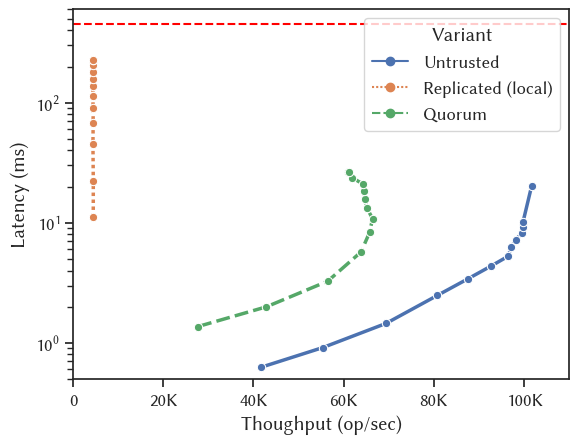

In [109]:
f = sns.lineplot(data=data[data["Put %"] == 20],
    x="Throughput", y="Latency (ms)", sort=False,
    hue="Variant", style="Variant", markers=['o'], linewidth=2.5,
    hue_order=["Untrusted", "Replicated (local)", "Quorum"])
# sns.move_legend(f, "upper left")
# f.set(xlim=(0, 110000), ylim=(0, 0.013))
f.set(xlim=(0, 110000), ylim=(0.5, 600), yscale="log")
f.axhline(450, color="red", linestyle="--")
f.set(xticklabels=["0", "20K", "40K", "60K", "80K", "100K"])
f.set(xlabel="Thoughput (op/sec)")

f.figure.savefig("throughput-latency.pdf", bbox_inches='tight')

/tmp/ipykernel_647807/3763764368.py:1: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  f = sns.lineplot(data=data.groupby(["Put %", "Variant"]).max(),
/tmp/ipykernel_647807/3763764368.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set(yticklabels=[0] + [f"{x}K" for x in range(50, 351, 50)])


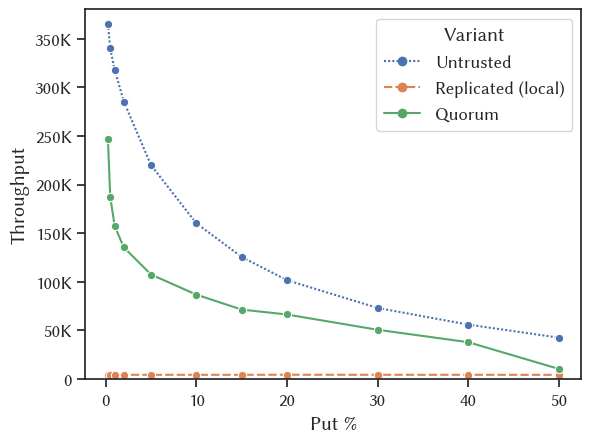

In [110]:
f = sns.lineplot(data=data.groupby(["Put %", "Variant"]).max(),
    x="Put %", y="Throughput", hue="Variant", style="Variant", markers=['o'],
    hue_order=["Untrusted", "Replicated (local)", "Quorum"])
f.set(ylim=(0, 380000))
f.set(yticklabels=[0] + [f"{x}K" for x in range(50, 351, 50)])
f.figure.savefig("ratio.pdf", bbox_inches='tight')
